# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
output_data_file_2 = "../output_data/cities_clean.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [74]:
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [75]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [76]:
#assign list variables to build data table.
City = []
Lat = []
Lng = []
Max_Temp= []
Humidity= []
Cloudiness= []
Wind_Speed= []
Country = []
Date = []

In [77]:
cities

['gewane',
 'pucallpa',
 'vila velha',
 'lagoa',
 'port elizabeth',
 'inderborskiy',
 'east london',
 'gunjur',
 'goderich',
 'atuona',
 'severo-kurilsk',
 'marsh harbour',
 'ushuaia',
 'barrow',
 'paradwip',
 'jizan',
 'narsaq',
 'luba',
 'mahebourg',
 'kampene',
 'tatawin',
 'rikitea',
 'blythe',
 'albany',
 'hilo',
 'chuguyevka',
 'torbay',
 'swan hill',
 'kavieng',
 'santa isabel',
 'okhotsk',
 'tazovskiy',
 'presidencia roque saenz pena',
 'busselton',
 'tuatapere',
 'russell',
 'taolanaro',
 'rio grande',
 'lolua',
 'pangnirtung',
 'beyneu',
 'saskylakh',
 'taoudenni',
 'helena',
 'guerrero negro',
 'sitka',
 'samarai',
 'padang',
 'pisco',
 'punta arenas',
 'mana',
 'malwan',
 'vaitupu',
 'airai',
 'maceio',
 'tasiilaq',
 'attawapiskat',
 'faanui',
 'dikson',
 'yellowknife',
 'ixtapa',
 'khani',
 'okha',
 'bluff',
 'butaritari',
 'kilindoni',
 'pevek',
 'yanchukan',
 'erenhot',
 'methoni',
 'ucluelet',
 'kapaa',
 'hermanus',
 'puerto ayora',
 'sibolga',
 'mataura',
 'sabla',
 'g

In [67]:
#cities = ['new norfolk',
 'barrow',
 'barentsburg',
 'staromaryevka',
 'thompson',
 'yumen',
 'bathsheba',
 'ushuaia',
 'yar-sale',
 'nishihara',
 'leningradskiy',
 'iqaluit',
 'severo-kurilsk']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [78]:
url = "http://api.openweathermap.org/data/2.5/weather?"
group_item_number = np.uint8(5)
i = np.uint8(0)
j = np.uint8(0)
item = np.uint16(0)
if len(cities)%group_item_number:
    group_number = int(len(cities) / group_item_number) + 1
else:
    group_number = len(cities) / group_item_number

for i in range(0, group_number):
    j=0
    while ((j < group_item_number) & (item < (len(cities)-1))):

        item = i * (group_item_number) + j
        city = cities[item]
        print(f'Processing record {item} of group {i} item {j} | {city}')
        try:
            response = requests.get(query_url + city).json()
            #City.append()
            Lat.append(response['coord']['lat'])
            Lng.append(response['coord']['lon'])
            Max_Temp.append(response['main']['temp_max'])
            Humidity.append(response['main']['humidity'])
            Cloudiness.append(response['clouds']['all'])
            Wind_Speed.append(response['wind']['speed'])
            Country.append(response['sys']['country'])
            Date.append(response['dt'])
        except KeyError:
            print('Data for ',city,' not available.  Skipping......')
            Lat.append(np.nan)
            Lng.append(np.nan)
            Max_Temp.append(np.nan)
            Humidity.append(np.nan)
            Cloudiness.append(np.nan)
            Wind_Speed.append(np.nan)
            Country.append(np.nan)
            Date.append(np.nan)
        j = j + 1

Processing record 0 of group 0 item 0 | gewane
Processing record 1 of group 0 item 1 | pucallpa
Processing record 2 of group 0 item 2 | vila velha
Processing record 3 of group 0 item 3 | lagoa
Processing record 4 of group 0 item 4 | port elizabeth
Processing record 5 of group 1 item 0 | inderborskiy
Data for  inderborskiy  not available.  Skipping......
Processing record 6 of group 1 item 1 | east london
Processing record 7 of group 1 item 2 | gunjur
Processing record 8 of group 1 item 3 | goderich
Processing record 9 of group 1 item 4 | atuona
Processing record 10 of group 2 item 0 | severo-kurilsk
Processing record 11 of group 2 item 1 | marsh harbour
Processing record 12 of group 2 item 2 | ushuaia
Processing record 13 of group 2 item 3 | barrow
Processing record 14 of group 2 item 4 | paradwip
Data for  paradwip  not available.  Skipping......
Processing record 15 of group 3 item 0 | jizan
Processing record 16 of group 3 item 1 | narsaq
Processing record 17 of group 3 item 2 | luba

Processing record 146 of group 29 item 1 | gurgan
Data for  gurgan  not available.  Skipping......
Processing record 147 of group 29 item 2 | port blair
Processing record 148 of group 29 item 3 | boyolangu
Processing record 149 of group 29 item 4 | skjervoy
Processing record 150 of group 30 item 0 | shagonar
Processing record 151 of group 30 item 1 | yining
Processing record 152 of group 30 item 2 | codrington
Processing record 153 of group 30 item 3 | majene
Processing record 154 of group 30 item 4 | igarka
Processing record 155 of group 31 item 0 | sovetskaya gavan
Processing record 156 of group 31 item 1 | batman
Processing record 157 of group 31 item 2 | la ronge
Processing record 158 of group 31 item 3 | mehamn
Processing record 159 of group 31 item 4 | grand river south east
Data for  grand river south east  not available.  Skipping......
Processing record 160 of group 32 item 0 | charyshskoye
Processing record 161 of group 32 item 1 | avera
Processing record 162 of group 32 item

Processing record 294 of group 58 item 4 | jabiru
Data for  jabiru  not available.  Skipping......
Processing record 295 of group 59 item 0 | sao felix do xingu
Processing record 296 of group 59 item 1 | weilheim
Processing record 297 of group 59 item 2 | saint-pierre
Processing record 298 of group 59 item 3 | mujiayingzi
Processing record 299 of group 59 item 4 | atar
Processing record 300 of group 60 item 0 | bulawayo
Processing record 301 of group 60 item 1 | alepe
Processing record 302 of group 60 item 2 | dicabisagan
Processing record 303 of group 60 item 3 | babol
Processing record 304 of group 60 item 4 | nikolskoye
Processing record 305 of group 61 item 0 | belushya guba
Data for  belushya guba  not available.  Skipping......
Processing record 306 of group 61 item 1 | nisia floresta
Processing record 307 of group 61 item 2 | puerto escondido
Processing record 308 of group 61 item 3 | kazalinsk
Data for  kazalinsk  not available.  Skipping......
Processing record 309 of group 61

Processing record 434 of group 86 item 4 | vanavara
Processing record 435 of group 87 item 0 | rundu
Processing record 436 of group 87 item 1 | college
Processing record 437 of group 87 item 2 | gazli
Processing record 438 of group 87 item 3 | baijiantan
Processing record 439 of group 87 item 4 | tecolutilla
Processing record 440 of group 88 item 0 | grand gaube
Processing record 441 of group 88 item 1 | coquimbo
Processing record 442 of group 88 item 2 | parnamirim
Processing record 443 of group 88 item 3 | kavaratti
Processing record 444 of group 88 item 4 | delaware
Processing record 445 of group 89 item 0 | alexandria
Processing record 446 of group 89 item 1 | cockburn town
Processing record 447 of group 89 item 2 | sarangani
Processing record 448 of group 89 item 3 | lipari
Processing record 449 of group 89 item 4 | elban
Processing record 450 of group 90 item 0 | gizo
Processing record 451 of group 90 item 1 | meyungs
Data for  meyungs  not available.  Skipping......
Processing r

Processing record 579 of group 115 item 4 | pafos
Processing record 580 of group 116 item 0 | porbandar
Processing record 581 of group 116 item 1 | tessalit
Processing record 582 of group 116 item 2 | utiroa
Data for  utiroa  not available.  Skipping......
Processing record 583 of group 116 item 3 | pendleton
Processing record 584 of group 116 item 4 | emba
Processing record 585 of group 117 item 0 | cascais
Processing record 586 of group 117 item 1 | kedrovyy
Processing record 587 of group 117 item 2 | zhuhai
Processing record 588 of group 117 item 3 | shenxian
Processing record 589 of group 117 item 4 | bahia honda
Processing record 590 of group 118 item 0 | anori
Processing record 591 of group 118 item 1 | margate
Processing record 592 of group 118 item 2 | mustla
Processing record 593 of group 118 item 3 | culpeper
Processing record 594 of group 118 item 4 | shingu
Processing record 595 of group 119 item 0 | launceston
Processing record 596 of group 119 item 1 | vila franca do camp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [141]:
main_df.to_csv(output_data_file)

In [142]:
main_df = pd.DataFrame({'city' : cities, 'Latitude' : Lat, 'Longitude': Lng, "Max temp": Max_Temp, "Humidity" : Humidity, \
            "Cloudiness" : Cloudiness, 'Wind Speed' : Wind_Speed, 'Country' : Country , 'Date' : Date})
len(main_df)
main_df

,city,Latitude,Longitude,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gewane,10.17,40.65,30.89,34.0,89.0,4.19,ET,1.592171e+09
1,pucallpa,-8.38,-74.55,30.00,58.0,40.0,4.60,PE,1.592171e+09
2,vila velha,-20.33,-40.29,24.00,83.0,20.0,3.10,BR,1.592171e+09
3,lagoa,39.05,-27.98,16.80,75.0,13.0,4.95,PT,1.592171e+09
4,port elizabeth,-33.92,25.57,16.00,59.0,42.0,5.10,ZA,1.592171e+09
...,...,...,...,...,...,...,...,...,...
598,guilin,25.28,110.29,25.00,94.0,90.0,1.00,CN,1.592171e+09
599,tura,25.52,90.22,23.96,96.0,78.0,2.61,IN,1.592171e+09
600,cruz grande,16.73,-99.13,31.00,66.0,20.0,6.20,MX,1.592171e+09
601,te anau,-45.42,167.72,9.95,77.0,100.0,2.59,NZ,1.592171e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [143]:
#there are no cities with humidity over 100%
main_df.loc[(main_df['Humidity'] > 100)][:]

,city,Latitude,Longitude,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [144]:
#  Get the indices of cities that have humidity over 100%.
humidity_index = main_df.loc[(main_df['Humidity'] > 100)].index
humidity_index

Int64Index([], dtype='int64')

In [145]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = main_df.drop(index = humidity_index)
clean_city_data

,city,Latitude,Longitude,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gewane,10.17,40.65,30.89,34.0,89.0,4.19,ET,1.592171e+09
1,pucallpa,-8.38,-74.55,30.00,58.0,40.0,4.60,PE,1.592171e+09
2,vila velha,-20.33,-40.29,24.00,83.0,20.0,3.10,BR,1.592171e+09
3,lagoa,39.05,-27.98,16.80,75.0,13.0,4.95,PT,1.592171e+09
4,port elizabeth,-33.92,25.57,16.00,59.0,42.0,5.10,ZA,1.592171e+09
...,...,...,...,...,...,...,...,...,...
598,guilin,25.28,110.29,25.00,94.0,90.0,1.00,CN,1.592171e+09
599,tura,25.52,90.22,23.96,96.0,78.0,2.61,IN,1.592171e+09
600,cruz grande,16.73,-99.13,31.00,66.0,20.0,6.20,MX,1.592171e+09
601,te anau,-45.42,167.72,9.95,77.0,100.0,2.59,NZ,1.592171e+09


In [146]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file_2)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

06/14/2020


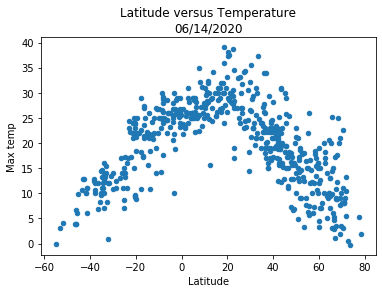

In [166]:
now = datetime.now()
date = now.strftime("%m/%d/%Y")
temperature_title = "Latitude versus Temperature\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Max temp', kind='scatter', title = temperature_title)

## Latitude vs. Humidity Plot

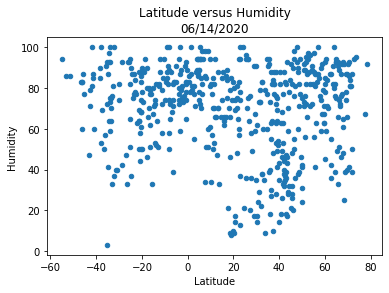

In [167]:
humidity_title = "Latitude versus Humidity\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Humidity', kind='scatter', title = humidity_title)

## Latitude vs. Cloudiness Plot

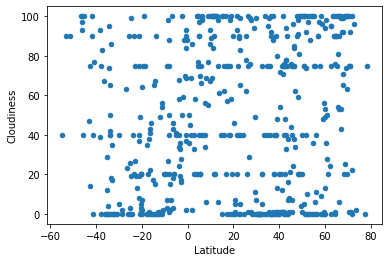

In [150]:
cloudiness_title = "Latitude versus Cloudiness\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Cloudiness', kind='scatter', )

## Latitude vs. Wind Speed Plot

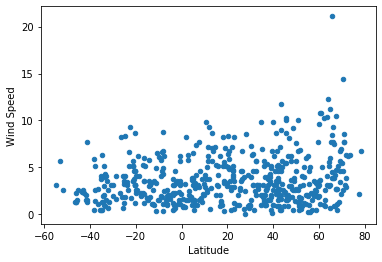

In [152]:
clean_city_data.plot(x = 'Latitude', y = 'Wind Speed', kind='scatter')

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

In [16]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression